In [21]:
## Extract files

import os
from zipfile import ZipFile

if 'train.csv' not in os.listdir():
    ZipFile('titanic.zip','r').extractall()

In [104]:
## Load data

import pandas as pd

df_train = pd.read_csv('train.csv', index_col='PassengerId')
display(df_train)
X_train, y_train = df_train.loc[:, df_train.columns != 'Survived'], df_train['Survived']
display(df_train.describe())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
# ## Create validation set (Hold - out)

# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(df_train.loc[:, df_train.columns != 'Survived'],df_train['Survived'], test_size=0.2, random_state=42, stratify=df_train['Survived'])

In [108]:
## Check null values

print('Total entries: ', len(X_train))
display(X_train.isnull().sum())
display(X_train.nunique())

Total entries:  891


Pclass                          0
Name                            0
Sex                             0
Age                             0
SibSp                           0
Parch                           0
Ticket                          0
Fare                            0
Cabin                         687
Embarked                        2
Titles                          0
Ticket_n                        0
Surname                         0
Surname_frequency               0
Family_size                     0
Family_size_cat                 0
Ticket_frequency                0
Family_survival_rate            0
Ticket_group_survival_rate      0
dtype: int64

Pclass                          3
Name                          891
Sex                             2
Age                            88
SibSp                           7
Parch                           7
Ticket                        681
Fare                          248
Cabin                         147
Embarked                        3
Titles                          6
Ticket_n                      679
Surname                       667
Surname_frequency               8
Family_size                     9
Family_size_cat                 3
Ticket_frequency                7
Family_survival_rate            3
Ticket_group_survival_rate      3
dtype: int64

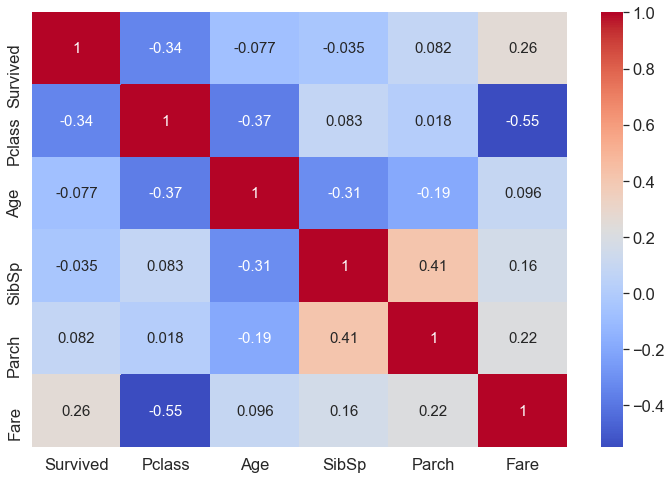

In [109]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
sns.heatmap(df_train.corr(), cmap='coolwarm', annot=True, annot_kws={'size':15})
plt.show()

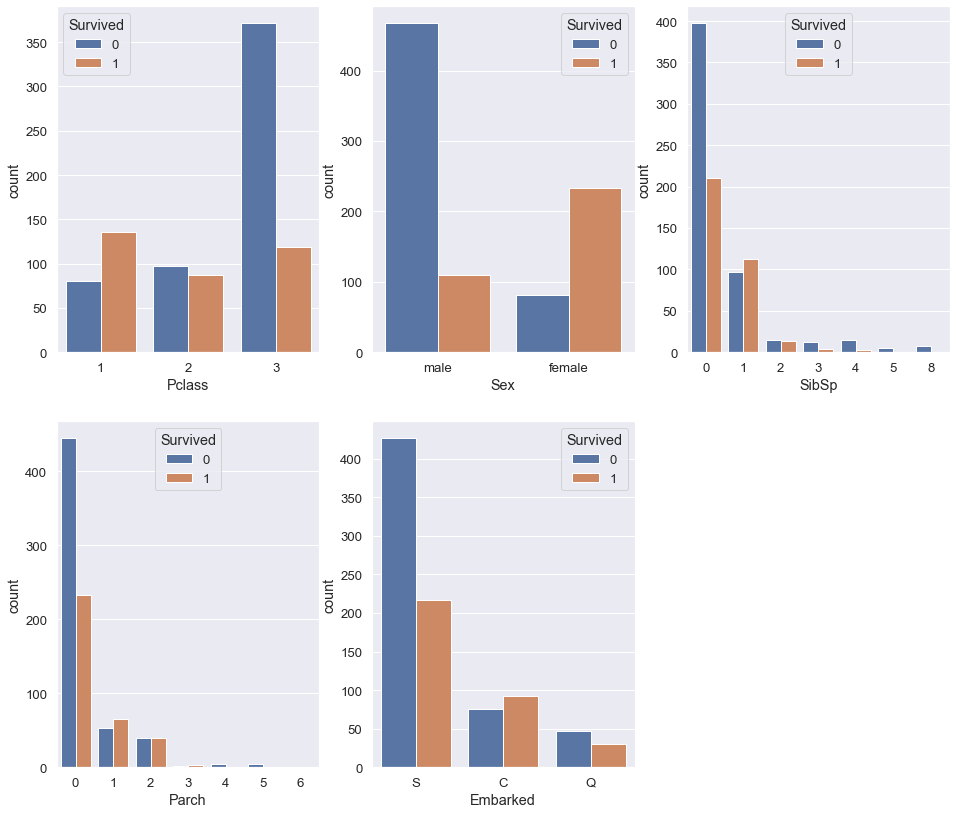

In [110]:
cat_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
for i, feature in enumerate(cat_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=X_train, x=feature, hue=y_train)  

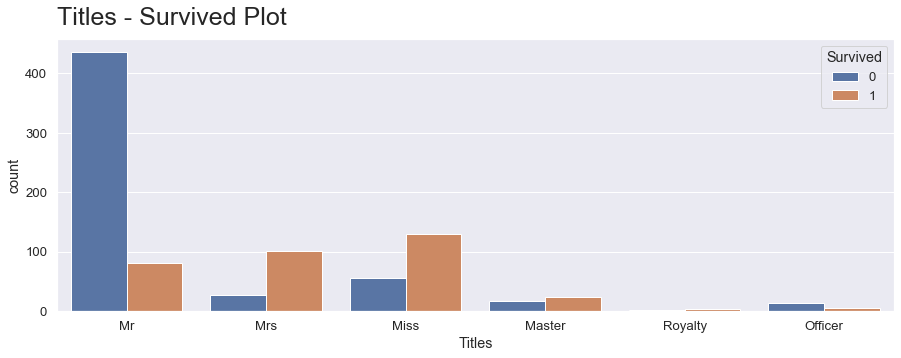

In [111]:
## Estimate Titles (for Age estimation)

title_dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles(row):
    return title_dictionary[row['Name'].split(', ')[1].split('.')[0]]

X_train['Titles'] = X_train.apply(get_titles, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.countplot(data=X_train, x='Titles', hue=y_train, ax=ax)
ax.set_title('Titles - Survived Plot', loc='Left', size=25, y=1.03)
plt.show()

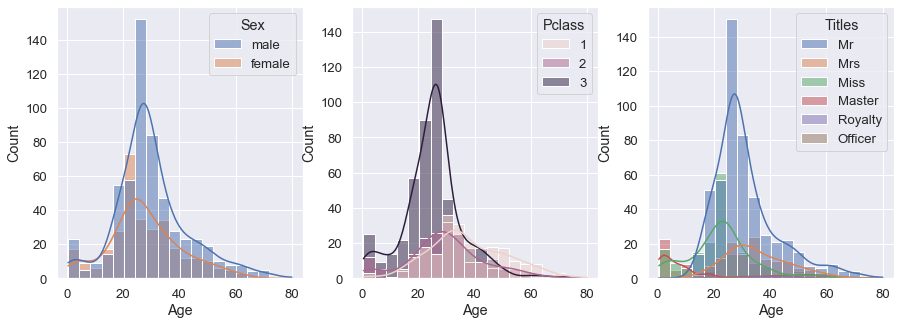

In [112]:
## Check Age correlations

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data=X_train,x='Age',kde=True, bins=20,hue='Sex')
plt.subplot(1,3,2)
sns.histplot(data=X_train,x='Age',kde=True, bins=20,hue='Pclass')
plt.subplot(1,3,3)
sns.histplot(data=X_train,x='Age',kde=True, bins=20,hue='Titles')
plt.show()

## Estimate Age

def estimate_age(df):
    median_by_titles = df.groupby('Titles')['Age'].median()
    median_by_gender = df.groupby('Sex')['Age'].median()
    median_by_pclass = df.groupby('Pclass')['Age'].median()
    return pd.Series(data=((median_by_titles[df['Titles']].values + median_by_gender[df['Sex']].values + median_by_pclass[df['Pclass']].values)//3), index=df.index)

X_train['Age'].fillna(estimate_age(X_train), axis=0, inplace=True)

In [113]:
## Check embarked missing rows

display(X_train[X_train['Embarked'].isnull()])
display(X_train[X_train['Ticket'] == '113572'])
display(X_train[X_train['Cabin'] == 'B28'])

print(X_train['Embarked'].value_counts())

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,Ticket_n,Surname,Surname_frequency,Family_size,Family_size_cat,Ticket_frequency,Family_survival_rate,Ticket_group_survival_rate
PassengerId,,,,,,,,,,,,,,,,,,,
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,113572,Icard,1,1,alone,2,1.0,1.0
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,113572,Stone,1,1,alone,2,1.0,1.0


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,Ticket_n,Surname,Surname_frequency,Family_size,Family_size_cat,Ticket_frequency,Family_survival_rate,Ticket_group_survival_rate
PassengerId,,,,,,,,,,,,,,,,,,,
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,113572,Icard,1,1,alone,2,1.0,1.0
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,113572,Stone,1,1,alone,2,1.0,1.0


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,Ticket_n,Surname,Surname_frequency,Family_size,Family_size_cat,Ticket_frequency,Family_survival_rate,Ticket_group_survival_rate
PassengerId,,,,,,,,,,,,,,,,,,,
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,113572,Icard,1,1,alone,2,1.0,1.0
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,113572,Stone,1,1,alone,2,1.0,1.0


S    644
C    168
Q     77
Name: Embarked, dtype: int64


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,Ticket_n,Surname,Surname_frequency,Family_size,Family_size_cat,Ticket_frequency,Family_survival_rate,Ticket_group_survival_rate
PassengerId,,,,,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,521171,Braund,2,2,small_family,1,0.0,0.0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,17599,Cumings,1,2,small_family,1,1.0,1.0
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,23101282,Heikkinen,1,1,alone,1,1.0,1.0


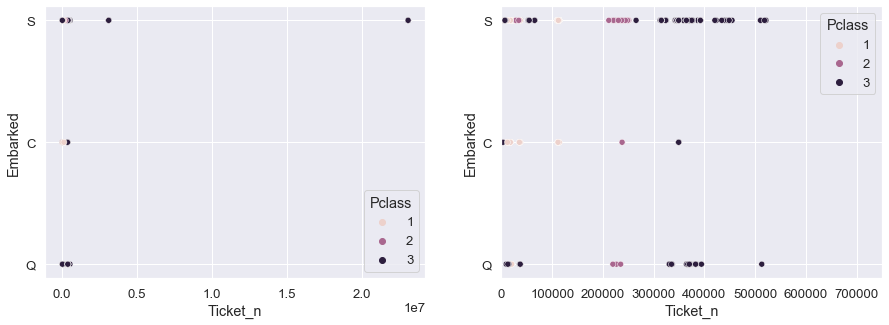

In [114]:
## Check tickets

import regex as re

def fill_ticket_n(row):
    try:
        return int(re.sub("[^0-9]","",row['Ticket']))
    except:
        return int(0)

X_train['Ticket_n'] = X_train.apply(fill_ticket_n,axis=1)
display(X_train.head(3))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=X_train,x='Ticket_n',y='Embarked', hue='Pclass')
plt.subplot(1,2,2)
sns.scatterplot(data=X_train,x='Ticket_n',y='Embarked', hue='Pclass')
plt.axis(xmin=0, xmax=750000)
plt.show()

Andersson    9
Sage         7
Carter       6
Goodwin      6
Panula       6
            ..
Bailey       1
Frolicher    1
Nankoff      1
Ayoub        1
Ringhini     1
Name: Surname, Length: 667, dtype: int64

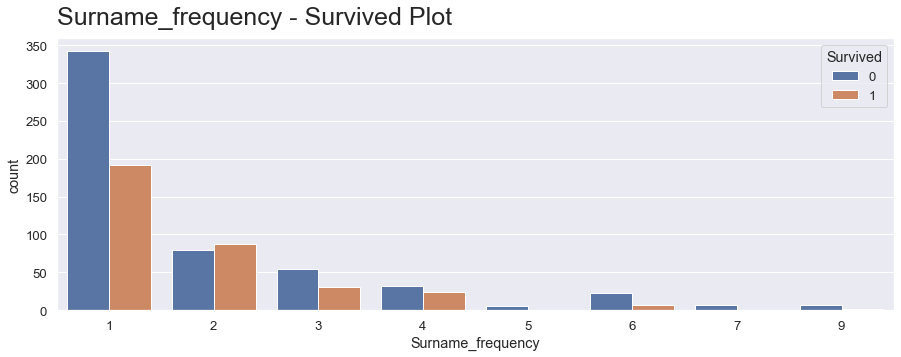

In [115]:
## Feature Engineering: creating Surname_frequency feature

X_train['Surname'] = X_train['Name'].apply(lambda x:x.split(', ')[0])
display(X_train['Surname'].value_counts())
X_train['Surname_frequency'] = X_train['Surname'].apply(lambda x:X_train['Surname'].value_counts()[x])

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.countplot(data=X_train, x='Surname_frequency', hue=y_train, ax=ax)
ax.set_title('Surname_frequency - Survived Plot', loc='Left', size=25, y=1.03)
plt.show()

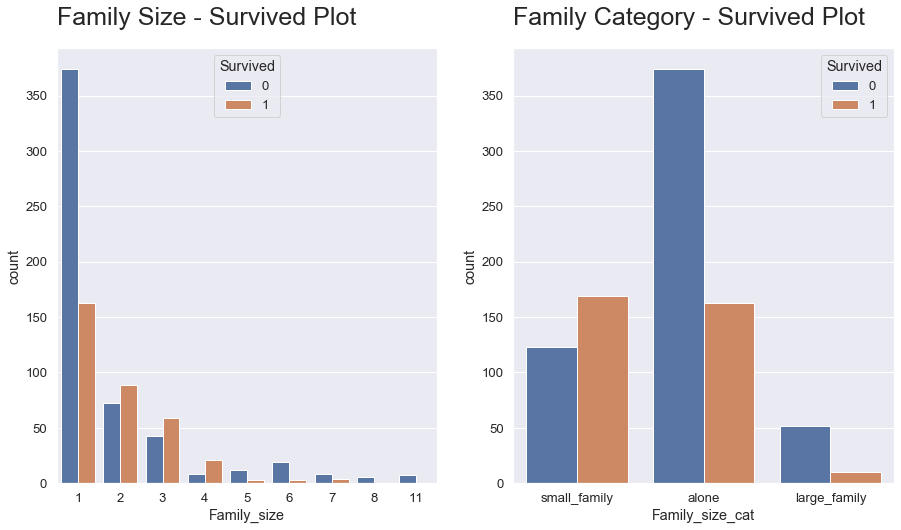

In [116]:
## Feature Engineering: Family Size

X_train['Family_size'] = X_train['SibSp'] + X_train['Parch'] + 1
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(15, 8))
sns.countplot(data=X_train, x='Family_size', hue=y_train, ax=ax)
ax.set_title('Family Size - Survived Plot', size=25, loc='Left', y=1.04)

X_train['Family_size_cat'] = X_train['Family_size'].replace({1:'alone', 2:'small_family', 3:'small_family', 4:'small_family'
                                                            ,5:'large_family', 6:'large_family', 7:'large_family'
                                                            ,8:'large_family', 9:'large_family', 10:'large_family', 
                                                            11:'large_family'})
sns.countplot(data=X_train, x='Family_size_cat', hue=y_train, ax=ax2)
ax2.set_title('Family Category - Survived Plot', size=25, loc='Left', y=1.04)

plt.show()

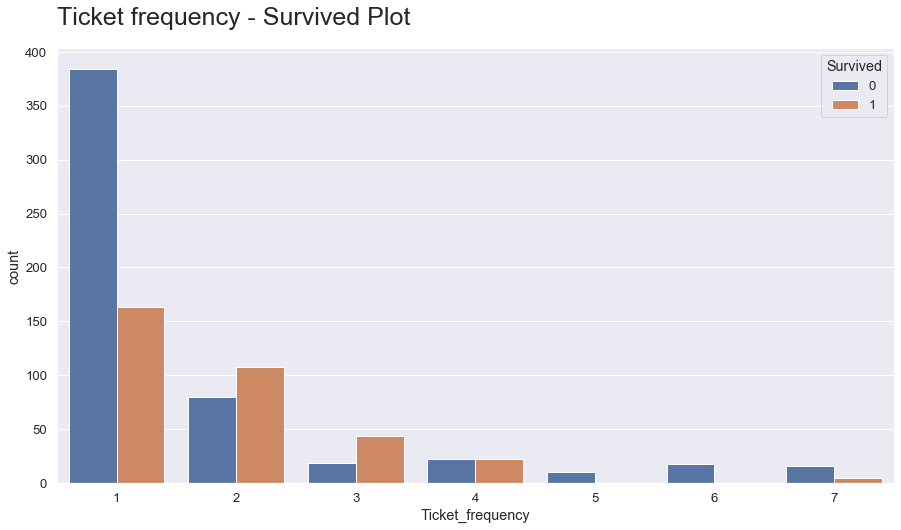

In [117]:
## Feature Engineering: Ticket frequency

X_train['Ticket_frequency'] =X_train['Ticket'].map(X_train['Ticket'].value_counts(dropna=False))

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.countplot(data=X_train, x='Ticket_frequency', hue=y_train, ax=ax)
ax.set_title('Ticket frequency - Survived Plot', size=25, loc='Left', y=1.04)

plt.show()

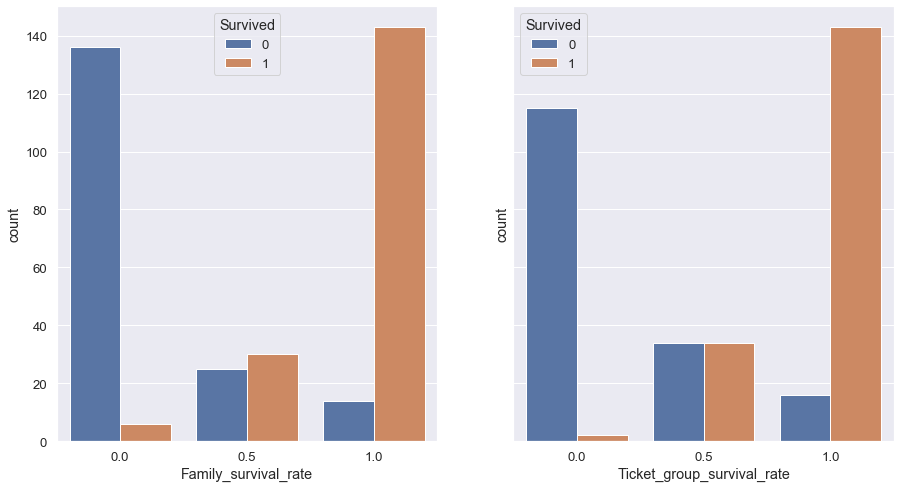

In [118]:
## Feature Engineering: Survival rate

X_temp = pd.concat([X_train[['Surname','Ticket']],y_train],axis=1)
X_train['Family_survival_rate'] = X_train['Surname'].map(X_temp.groupby(['Surname'])['Survived'].median())
X_train['Ticket_group_survival_rate'] = X_train['Ticket'].map(X_temp.groupby(['Ticket'])['Survived'].median())

fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

sns.countplot(data=X_train[X_train['Family_size'] > 1], x='Family_survival_rate', hue=y_train, ax=ax[0])
# we will only take into account those instance with Family size > 1 for visualization to explore the effectiveness of the Survival rate feature

sns.countplot(data=X_train[X_train['Ticket_frequency'] > 1], x='Ticket_group_survival_rate', hue=y_train, ax=ax[1])
# we will only take into account those instance with Ticket_frequency > 1 for visualization to explore the effectiveness of the Survival rate feature

plt.show()

In [105]:
## Transformation pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

class TitlesAttribute(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.title_dictionary = {
            "Capt": "Officer",
            "Col": "Officer",
            "Major": "Officer",
            "Jonkheer": "Royalty",
            "Don": "Royalty",
            "Sir" : "Royalty",
            "Dr": "Officer",
            "Rev": "Officer",
            "the Countess":"Royalty",
            "Mme": "Mrs",
            "Mlle": "Miss",
            "Ms": "Mrs",
            "Mr" : "Mr",
            "Mrs" : "Mrs",
            "Miss" : "Miss",
            "Master" : "Master",
            "Lady" : "Royalty"
        }
    def fit(self, X, y=None):
        return self
    def get_titles(self, row):
        try:
            return self.title_dictionary[row['Name'].split(', ')[1].split('.')[0]]
        except:
            if row['Sex'] == 'male':
                return "Mr"
            else:
                return "Miss"
    def transform(self, X, y=None):
        X['Titles'] = X.apply(self.get_titles, axis=1)
        return X

class AgesImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.median_by_titles = X.groupby('Titles')['Age'].median()
        self.median_by_gender = X.groupby('Sex')['Age'].median()
        self.median_by_pclass = X.groupby('Pclass')['Age'].median()
        return self
    def estimate_age(self, df):
            return pd.Series(data=((self.median_by_titles[df['Titles']].values + self.median_by_gender[df['Sex']].values + self.median_by_pclass[df['Pclass']].values)//3), index=df.index)
    def transform(self, X, y=None):
        X['Age'].fillna(self.estimate_age(X), axis=0, inplace=True)
        return X

class TicketNumberAttribute(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def fill_ticket_n(self,row):
            import regex as re
            try:
                return int(re.sub("[^0-9]","",row['Ticket']))
            except:
                return int(0)
    def transform(self, X, y=None):
        X['Ticket_n'] = X.apply(self.fill_ticket_n,axis=1)
        return X

class SurnameFrequencyAttribute(BaseEstimator, TransformerMixin): 
    def fit(self, X, y = None):
        X['Surname'] = X['Name'].apply(lambda x:x.split(', ')[0])
        self.surnames_n_repeated = X['Surname'].value_counts()
        return self # nothing else to do
    def check_surname(self, row):
        try:
            return self.surnames_n_repeated[row]
        except:
            return 0
    def transform(self, X):
        X['Surname'] = X['Name'].apply(lambda x:x.split(', ')[0])
        X['Surname_frequency'] = X['Surname'].apply(self.check_surname)
        return X

class FamilySizeAttribute(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X['Family_size'] = X['SibSp'] + X['Parch'] + 1
        X['Family_size_cat'] = X['Family_size'].replace({1:'alone', 2:'small_family', 3:'small_family', 4:'small_family'
                                                        ,5:'large_family', 6:'large_family', 7:'large_family'
                                                        ,8:'large_family', 9:'large_family', 10:'large_family', 
                                                        11:'large_family'})
        return X

class TicketFrequencyAttribute(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X['Ticket_frequency'] =X['Ticket'].map(X['Ticket'].value_counts(dropna=False))
        return X

class SurvivalRatesAttribute(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.X_temp = pd.concat([X[['Surname','Ticket']],y],axis=1)
        return self
    def transform(self, X, y=None):
        X['Family_survival_rate'] = X['Surname'].map(self.X_temp.groupby(['Surname'])['Survived'].median())
        X['Ticket_group_survival_rate'] = X['Ticket'].map(self.X_temp.groupby(['Ticket'])['Survived'].median())
        return X

class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), # Get rid of possible null values
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ("imputer", MostFrequentImputer()),
    ("encoder", OneHotEncoder(drop='first',sparse=False))
])

combined_pipeline = ColumnTransformer([
    ("num", num_pipeline, ['Age','Fare','Ticket_n','Surname_frequency','Ticket_frequency','Family_survival_rate','Ticket_group_survival_rate','Family_size']),
    ("cat", cat_pipeline, ['Pclass','Sex','Embarked','Titles','Family_size_cat']),
])

prep_pipeline = Pipeline([
    ("titles", TitlesAttribute()),
    ("ages_imputer", AgesImputer()),
    ("ticket_n", TicketNumberAttribute()),
    ("surname_frequency", SurnameFrequencyAttribute()),
    ("family_size", FamilySizeAttribute()),
    ("ticket_frequency", TicketFrequencyAttribute()),
    ("survival_rates", SurvivalRatesAttribute()),
    ("combined", combined_pipeline),
])

X_train_prep = prep_pipeline.fit_transform(X_train,y_train)
X_train_prep[0]

array([-0.55097434, -0.50244517, -0.06821981,  0.0792407 , -0.57916179,
       -0.83492139, -0.85024275,  0.05915988,  0.        ,  1.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ])

In [106]:
## Model building and fine tuning: Grid Search

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
# from sklearn.model_selection import RandomizedSearchCV

def execute_pipeline(features,labels, search_space=[
                    {"classifier": [LogisticRegression(random_state=42)],
                    "classifier__penalty": ['l2','l1'],
                    "classifier__C": np.logspace(0, 4, 10)
                    },
                    {"classifier": [LogisticRegression(random_state=42)],
                    "classifier__penalty": ['l2'],
                    "classifier__C": np.logspace(0, 4, 10),
                    "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                    },
                    {"classifier": [RandomForestClassifier(random_state=42)],
                    "classifier__n_estimators": [10,100,500,1000],
                    "classifier__max_depth":[5,8,15,25,30,None],
                    "classifier__min_samples_leaf":[1,2,5,10,15,100],
                    "classifier__max_leaf_nodes": [8,16,32]}
                 ], 
                 cv=5, verbose=0, n_jobs=-1):
    
    pipe = Pipeline([("classifier", RandomForestClassifier())])
    
    gridsearch = GridSearchCV(pipe, search_space, cv=cv, verbose=verbose,n_jobs=n_jobs) # Fit grid search
    best_model = gridsearch.fit(features, labels)
    print(best_model.best_estimator_)
    print("The mean accuracy of the model is:",best_model.score(features, labels))

    return best_model

best_estimator = execute_pipeline(X_train_prep,y_train)

Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=8, max_features='auto',
                                        max_leaf_nodes=32, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=False))],
         verbose=False)
The mean accuracy of the model is: 0.9955106621773289


In [31]:
## Check dummies

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_prep, y_train)
predictions_dummy = dummy_clf.predict(X_train_prep)

print(dummy_clf.score(X_train_prep,y_train))
print(confusion_matrix(y_train, predictions_dummy,labels=[1,0]))
print('Precision: ', precision_score(y_train, predictions_dummy))
print('Recall: ', recall_score(y_train, predictions_dummy))
print('F1: ', f1_score(y_train, predictions_dummy))


0.6165730337078652
[[  0 273]
 [  0 439]]
Precision:  0.0
Recall:  0.0
F1:  0.0


In [107]:
import pandas as pd

X_test = pd.read_csv('test.csv', index_col='PassengerId')

X_test_prep = prep_pipeline.transform(X_test)
X_test['Survived'] = best_estimator.predict(X_test_prep)
display(X_test)

X_test[['PassengerId','Survived']].to_csv('submission.csv',index=False)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,Ticket_n,Surname,Surname_frequency,Family_size,Family_size_cat,Ticket_frequency,Family_survival_rate,Ticket_group_survival_rate,Survived
PassengerId,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,330911,Kelly,4,1,alone,1,1.0,NaN,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,363272,Wilkes,0,2,small_family,1,NaN,NaN,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,240276,Myles,0,1,alone,1,NaN,NaN,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,315154,Wirz,0,1,alone,1,NaN,NaN,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3101298,Hirvonen,1,3,small_family,1,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S,Mr,53236,Spector,0,1,alone,1,NaN,NaN,0
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Miss,17758,Oliva y Ocana,0,1,alone,1,NaN,0.5,1
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,3101262,Saether,0,1,alone,1,NaN,NaN,0


KeyError: "['PassengerId'] not in index"